# Practice Problems 3

Consider the following two-class classification problem, $C_1$ and $C_2$. The probability that an
observation $x ∈ [0, 2]$ is generated by each of the classes is given by the following probability
density functions: $ P(x|C_1) = \frac{2-x}{2}$ and $P(x|C_2) = \frac{1}{2}$. In addition, the a priori probabilities of the classes are: $P(C_1) = \frac{3}{4}$ and $P(C_2) = \frac{1}{4}$.

## Exercise a

Which values of x should be classified in $C_1$ and which values in $C_2$?

As we already know the priors and the density function of the likelihoods, we can just plug this information into the Bayes formula so that we can determine the probability of the class given a certan value of $x$. 

First we will define the probability of $P(x)$ as:

$$P(x) = P(x|C_1)P(C_1) + P(x|C_2)P(C_2) = \dfrac{2-x}{2} \cdot \dfrac{3}{4} + \dfrac{1}{2} \cdot \dfrac{1}{4}$$

$$P(x) = \dfrac{7-3x}{8}$$

Now, we can use the Bayes rule to get the values of the posteriors:

$$
\begin{align*}
    P(C_1|x) &=& \dfrac{P(x|C_1)P(C_1)}{P(x)} &=& \dfrac{\frac{2x-2}{2} \cdot \frac{3}{4}}{\frac{7-3x}{8}} & = & \dfrac{6-3x}{7-3x}\\
    P(C_2|x) &=& \dfrac{P(x|C_2)P(C_2)}{P(x)} &=& \dfrac{\frac{1}{2} \cdot \frac{1}{4}}{\frac{7-3x}{8}} & = & \dfrac{1}{7-3x}\\
\end{align*}
$$

Having this expressions to determine the probability of each class given a value of $x$, we can use them to determine the intervals of values of $x$ that are related to each class. We can say it as:

$$x \in C_1 \quad \text{if} \quad P(C_1|x) >  P(C_2|x) \quad \text{otherwise} \quad x \in C_2$$

Using the expression $ P(C_1|x) >  P(C_2|x)$ we get:

$$
\begin{array}{rcl}
    P(C_1|x) &>&  P(C_2|x) \\ \\
    \dfrac{6-3x}{7-3x} &>&  \dfrac{1}{7-3x} \\ \\
    6 - 3x &>& 1 \\
    5 &>& 3x \\ \\
    \dfrac{5}{3} &>& x
\end{array}
$$

As a final result, we can conclude:

$$x \in \left[0, \dfrac{5}{3}\right] \Longrightarrow x \in C_1$$
$$x \in \left[\dfrac{5}{3} , 2\right] \Longrightarrow x \in C_2$$

We can check this decision region in the following plot:

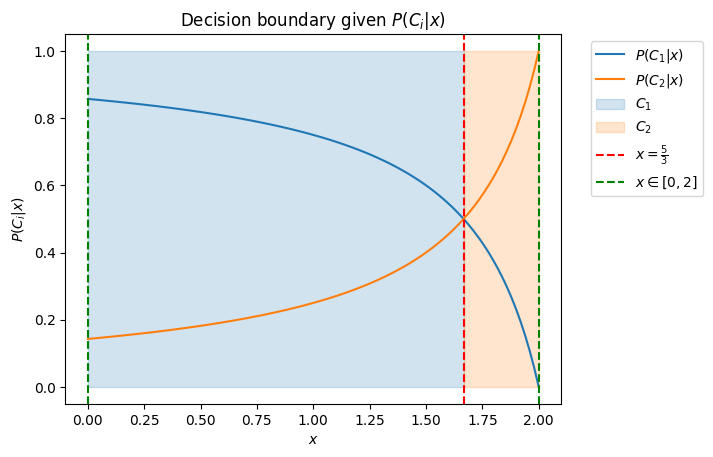

In [1]:
import matplotlib.pyplot as plt
import numpy as np

posteriorC1 = lambda x: (6-3*x)/(7-3*x)
posteriorC2 = lambda x: 1/(7-3*x)

x = np.linspace(0,2,100)
boundary = 5/3

plt.plot(x,posteriorC1(x), label = '$P(C_1 | x)$', color = 'tab:blue')
plt.plot(x,posteriorC2(x), label = '$P(C_2 | x)$', color = 'tab:orange')
plt.fill([0,0,boundary,boundary],[0,1,1,0], color = 'tab:blue', alpha = 0.2, label = '$C_1$')
plt.fill([boundary,2,2,boundary],[0,0,1,1], color = 'tab:orange', alpha = 0.2, label = '$C_2$')
plt.axvline(boundary, 0, 1, color='red' , linestyle = '--', label = '$x = \\frac{5}{3}$')
plt.axvline(0, 0, 1, color='green' , linestyle = '--', label = '$x \\in [0,2]$')
plt.axvline(2, 0, 1, color='green' , linestyle = '--')
plt.xlabel('$x$')
plt.ylabel('$P(C_i | x)$')
plt.title('Decision boundary given $P(C_i | x)$')
plt.legend(bbox_to_anchor = (1.3,1), loc = 'upper right')
plt.show()

## Exercise b

Suppose now that there is a cost $λ_{ij}$ associated with classifying an example $x$ from class $C_j$ into class $C_i$. Suppose further that $λ_{11} = λ_{22} = 0$. What values would you give to $λ_{12}$ and $λ_{21}$ such that the classification intervals of $x$ for $C_1$ and $C_2$ were $[0, 1]$ and $[1, 2]$
respectively?

As we want that the two decision regions may have the same size, we must add a higher risk to classify our samples in class $C_1$ (Which means that missclassify samples from class $C_2$ must have a higher cost) so that the boundary moves from $\frac{5}{3}$ to $1$. This means, that:

$$\lambda_{12} > \lambda_{21}$$

Also, and using the definition of risk, we can modify our boundary given the specific value. The risk for each class is defined as:

$$R(\alpha_1 , x) = \sum_{k=1}^{2} \lambda_{1k} P(C_k | x) = \lambda_{11} P(C_1 | x) + \lambda_{12} P(C_2 | x)$$

$$R(\alpha_2 , x) = \sum_{k=1}^{2} \lambda_{2k} P(C_k | x) = \lambda_{21} P(C_1 | x) + \lambda_{22} P(C_2 | x)$$

Knowing that $λ_{11} = λ_{22} = 0$, our expression reduces to:

$$R(\alpha_1 , x) = \lambda_{12} P(C_2 | x) = \lambda_{12} \cdot \dfrac{1}{7-3x}$$

$$R(\alpha_2 , x) = \lambda_{21} P(C_1 | x) = \lambda_{21} \cdot \dfrac{6-3x}{7-3x}$$

As we want to choose the class less risky, we define our selecton criteria as:

$$x \in C_1 \quad \text{if} \quad R(\alpha_1,x) <  R(\alpha_2,x) \quad \text{otherwise} \quad x \in C_2$$

Using $R(\alpha_1,x) <  R(\alpha_2,x)$, we have:

$$
\begin{array}{rcl}
    R(\alpha_1,x) &<&  R(\alpha_2,x) \\ \\
    \lambda_{12} \cdot \dfrac{1}{7-3x} &<&  \lambda_{21} \cdot \dfrac{6-3x}{7-3x} \\ \\
    \lambda_{12}  &<&  \lambda_{21} (6-3x) \\ \\
    \dfrac{\lambda_{12}}{\lambda_{21}}  &<&  6-3x \\ \\
    3x  &<&  6 - \dfrac{\lambda_{12}}{\lambda_{21}} \\ \\
    x  &<&  2 - \dfrac{\lambda_{12}}{3\lambda_{21}} \\ \\
\end{array}
$$

As we want to move our decision boundary to $x=1$, we must ensure that:

$$2 - \dfrac{\lambda_{12}}{3\lambda_{21}} = 1 \Longrightarrow 1 = \dfrac{\lambda_{12}}{3\lambda_{21}} \Longrightarrow 3\lambda_{21} = \lambda_{12}$$

As it was purposed at the beginning, we got that $\lambda_{12} > \lambda_{21}$

The following plot will show the final decision boundary given $\lambda_{12} = 1$ and $\lambda_{21} = \frac{1}{3}$




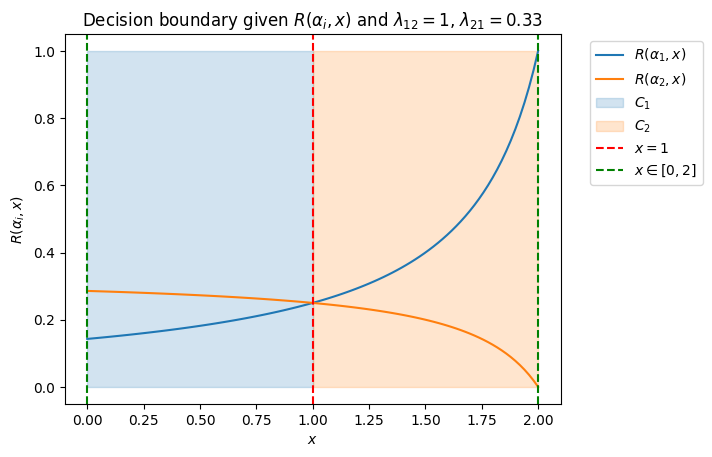

In [2]:
import matplotlib.pyplot as plt
import numpy as np

lambda12 = 1
lambda21 = 1/3

riskAlpha2 = lambda x: lambda21*(6-3*x)/(7-3*x)
riskAlpha1 = lambda x: lambda12*1/(7-3*x)

x = np.linspace(0,2,100)
boundary = 1

plt.plot(x,riskAlpha1(x), label = '$R(\\alpha_1,x)$', color = 'tab:blue')
plt.plot(x,riskAlpha2(x), label = '$R(\\alpha_2,x)$', color = 'tab:orange')
plt.fill([0,0,boundary,boundary],[0,1,1,0], color = 'tab:blue', alpha = 0.2, label = '$C_1$')
plt.fill([boundary,2,2,boundary],[0,0,1,1], color = 'tab:orange', alpha = 0.2, label = '$C_2$')
plt.axvline(boundary, 0, 1, color='red' , linestyle = '--', label = '$x = 1$')
plt.axvline(0, 0, 1, color='green' , linestyle = '--', label = '$x \\in [0,2]$')
plt.axvline(2, 0, 1, color='green' , linestyle = '--')
plt.xlabel('$x$')
plt.ylabel('$R(\\alpha_i,x)$')
plt.title(f'Decision boundary given $R(\\alpha_i,x)$ and $\\lambda_{{12}} = {lambda12}$, $\\lambda_{{21}} = {lambda21:.2f}$')
plt.legend(bbox_to_anchor = (1.3,1), loc = 'upper right')
plt.show()